In [1]:
import joblib

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/xgb_model_without_lstm_ny.joblib'

# Load the model
xgb_without_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/xgb_model_with_lstm_ny.joblib'

# Load the model
xgb_with_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/rf_model_without_lstm_ny.joblib'

# Load the model
rf_without_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/rf_model_with_lstm_ny.joblib'

# Load the model
rf_with_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/linear_model_without_lstm_ny.joblib'

# Load the model
linear_without_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/linear_model_with_lstm_ny.joblib'

# Load the model
linear_with_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/ridge_model_without_lstm_ny.joblib'

# Load the model
ridge_without_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/ridge_model_with_lstm_ny.joblib'

# Load the model
ridge_with_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/lasso_model_without_lstm_ny.joblib'

# Load the model
lasso_without_lstm = joblib.load(model_path)

# Specify the path to the model file, including the folder
model_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/lasso_model_with_lstm_ny.joblib'

# Load the model
lasso_with_lstm = joblib.load(model_path)

# Residual analysis

#### Without LSTM

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the test data
test_data_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaled_test_data_without_LSTM.csv'
df_test = pd.read_csv(test_data_path)

# Load the scaler used during training
scaler_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaler_without_LSTM.pkl'
scaler = joblib.load(scaler_path)

# Separate the features and target
test_data_scaled = df_test.drop(columns=['price'])
test_target_scaled = df_test['price']

# Inverse transform the target to original scale
test_target = scaler.inverse_transform(test_target_scaled.values.reshape(-1, 1)).flatten()

# Example dictionary with actual loaded models
models = {
    'XGBoost Without LSTM': xgb_without_lstm,
    'Random Forest Without LSTM': rf_without_lstm,
    'Linear Regression Without LSTM': linear_without_lstm,
    'Ridge Regression Without LSTM': ridge_without_lstm,
    'Lasso Regression Without LSTM': lasso_without_lstm,
}

# Initialize a dictionary to store residuals for each model
residuals = {}

# Loop through the models and calculate residuals
for model_name, model in models.items():
    # Make predictions on the scaled data
    predictions_scaled = model.predict(test_data_scaled)
    
    # Inverse transform the scaled predictions to original scale
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    
    # Calculate residuals using original scale values
    residuals[model_name] = test_target - predictions

# Initialize a dictionary to store the mean residuals and prediction tendencies
prediction_tendency = {}

# Loop through the residuals for each model and calculate the mean residual
for model_name, resid in residuals.items():
    mean_residual = resid.mean()
    
    # Determine if the model is overpredicting or underpredicting
    if mean_residual > 0:
        tendency = "Underpredicting"
    else:
        tendency = "Overpredicting"
    
    # Store the results
    prediction_tendency[model_name] = {'Mean Residual': mean_residual, 'Tendency': tendency}

# Display the results
for model_name, info in prediction_tendency.items():
    print(f"{model_name}:")
    print(f"  Mean Residual: {info['Mean Residual']:.2f}")
    print(f"  Tendency: {info['Tendency']}")

XGBoost Without LSTM:
  Mean Residual: 4.53
  Tendency: Underpredicting
Random Forest Without LSTM:
  Mean Residual: 0.88
  Tendency: Underpredicting
Linear Regression Without LSTM:
  Mean Residual: -115202742621.21
  Tendency: Overpredicting
Ridge Regression Without LSTM:
  Mean Residual: -6.02
  Tendency: Overpredicting
Lasso Regression Without LSTM:
  Mean Residual: 0.15
  Tendency: Underpredicting


#### With LSTM

In [3]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the test data
test_data_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaled_test_data_with_LSTM.csv'
df_test = pd.read_csv(test_data_path)

# Load the scaler used during training
scaler_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaler_with_LSTM.pkl'
scaler = joblib.load(scaler_path)

# Separate the features and target
test_data_scaled = df_test.drop(columns=['price'])
test_target_scaled = df_test['price']

# Inverse transform the target to original scale
test_target = scaler.inverse_transform(test_target_scaled.values.reshape(-1, 1)).flatten()

# Example dictionary with actual loaded models
models = {
    'XGBoost With LSTM': xgb_with_lstm,
    'Random Forest With LSTM': rf_with_lstm,
    'Linear Regression With LSTM': linear_with_lstm,
    'Ridge Regression With LSTM': ridge_with_lstm,
    'Lasso Regression With LSTM': lasso_with_lstm,
}

# Initialize a dictionary to store residuals for each model
residuals = {}

# Loop through the models and calculate residuals
for model_name, model in models.items():
    # Make predictions on the scaled data
    predictions_scaled = model.predict(test_data_scaled)
    
    # Inverse transform the scaled predictions to original scale
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    
    # Calculate residuals using original scale values
    residuals[model_name] = test_target - predictions

# Initialize a dictionary to store the mean residuals and prediction tendencies
prediction_tendency = {}

# Loop through the residuals for each model and calculate the mean residual
for model_name, resid in residuals.items():
    mean_residual = resid.mean()
    
    # Determine if the model is overpredicting or underpredicting
    if mean_residual > 0:
        tendency = "Underpredicting"
    else:
        tendency = "Overpredicting"
    
    # Store the results
    prediction_tendency[model_name] = {'Mean Residual': mean_residual, 'Tendency': tendency}

# Display the results
for model_name, info in prediction_tendency.items():
    print(f"{model_name}:")
    print(f"  Mean Residual: {info['Mean Residual']:.2f}")
    print(f"  Tendency: {info['Tendency']}")

XGBoost With LSTM:
  Mean Residual: 0.64
  Tendency: Underpredicting
Random Forest With LSTM:
  Mean Residual: 0.73
  Tendency: Underpredicting
Linear Regression With LSTM:
  Mean Residual: 953373813547.32
  Tendency: Underpredicting
Ridge Regression With LSTM:
  Mean Residual: -1.25
  Tendency: Overpredicting
Lasso Regression With LSTM:
  Mean Residual: -1.26
  Tendency: Overpredicting


# Feature importances

#### Without LSTM

<Figure size 2000x1000 with 0 Axes>

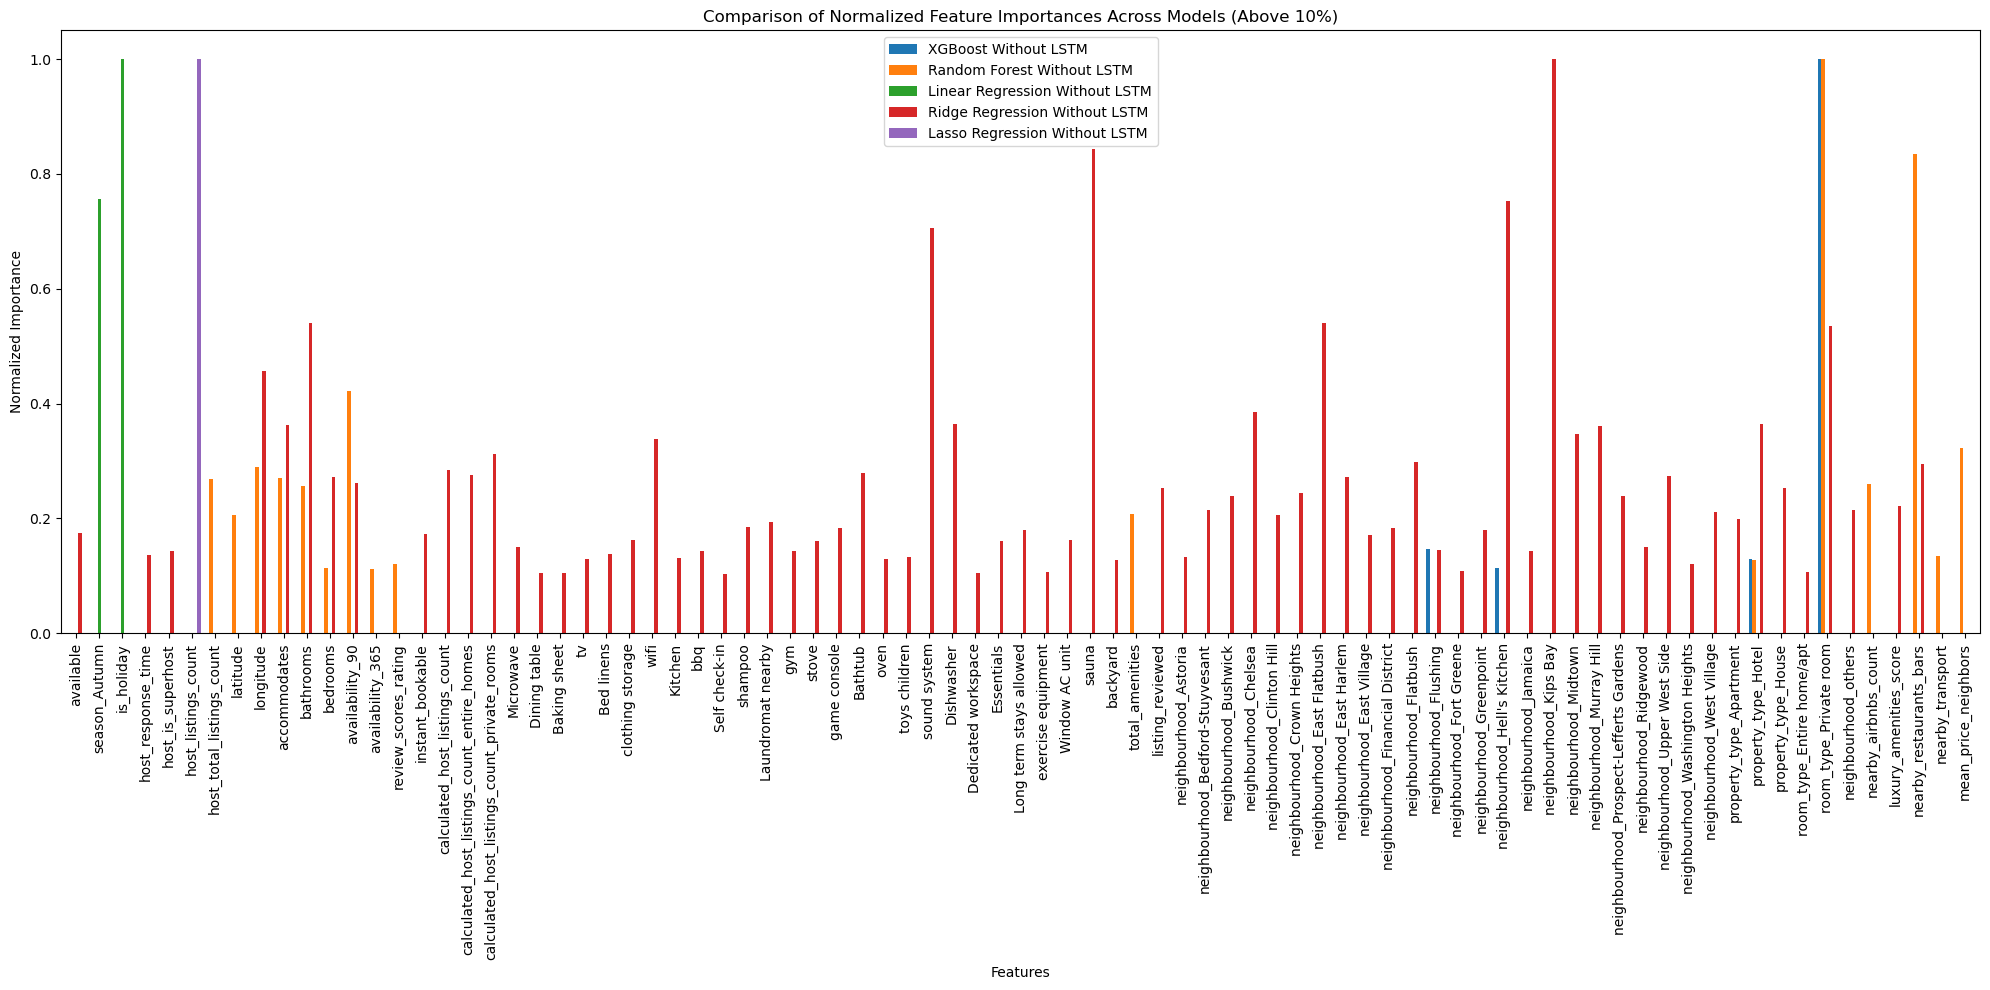

In [4]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# Load the test data
test_data_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaled_test_data_without_LSTM.csv'
df_test = pd.read_csv(test_data_path)

# Load the scaler used during training
scaler_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaler_without_LSTM.pkl'
scaler = joblib.load(scaler_path)

# Separate the features and target
test_data_scaled = df_test.drop(columns=['price'])
test_target_scaled = df_test['price']

# Inverse transform the target to original scale
test_target = scaler.inverse_transform(test_target_scaled.values.reshape(-1, 1)).flatten()

# Load or define your models here. Replace these with actual model loading code.
# Dummy model definitions for the sake of example
xgb_without_lstm = xgb.XGBRegressor().fit(test_data_scaled, test_target_scaled)
rf_without_lstm = RandomForestRegressor().fit(test_data_scaled, test_target_scaled)
linear_without_lstm = LinearRegression().fit(test_data_scaled, test_target_scaled)
ridge_without_lstm = Ridge().fit(test_data_scaled, test_target_scaled)
lasso_without_lstm = Lasso().fit(test_data_scaled, test_target_scaled)

models = {
    'XGBoost Without LSTM': xgb_without_lstm,
    'Random Forest Without LSTM': rf_without_lstm,
    'Linear Regression Without LSTM': linear_without_lstm,
    'Ridge Regression Without LSTM': ridge_without_lstm,
    'Lasso Regression Without LSTM': lasso_without_lstm,
}

# Get feature names
feature_names = test_data_scaled.columns

# Function to normalize feature importances
def normalize_importances(importances):
    scaler = MinMaxScaler()
    normalized_importances = scaler.fit_transform(importances.reshape(-1, 1)).flatten()
    return normalized_importances

# Collect all normalized importances in a DataFrame
all_importances = []

for model_name, model in models.items():
    if model_name.startswith('XGBoost') or model_name.startswith('Random Forest'):
        importances = model.feature_importances_
    elif model_name.startswith('Linear Regression') or model_name.startswith('Ridge Regression') or model_name.startswith('Lasso Regression'):
        importances = np.abs(model.coef_)
    
    normalized_importances = normalize_importances(importances)
    all_importances.append(pd.DataFrame(normalized_importances, index=feature_names, columns=[model_name]))

# Combine all importances into a single DataFrame
importances_df = pd.concat(all_importances, axis=1)

# Filter the DataFrame to keep only the importances above 10%
filtered_importances_df = importances_df[importances_df > 0.1].dropna(how='all')

# Plotting the bar plot with filtered features
plt.figure(figsize=(20, 10))

filtered_importances_df.plot(kind='bar', figsize=(20, 10), width=0.8)
plt.title('Comparison of Normalized Feature Importances Across Models (Above 10%)')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### With LSTM

<Figure size 2000x1000 with 0 Axes>

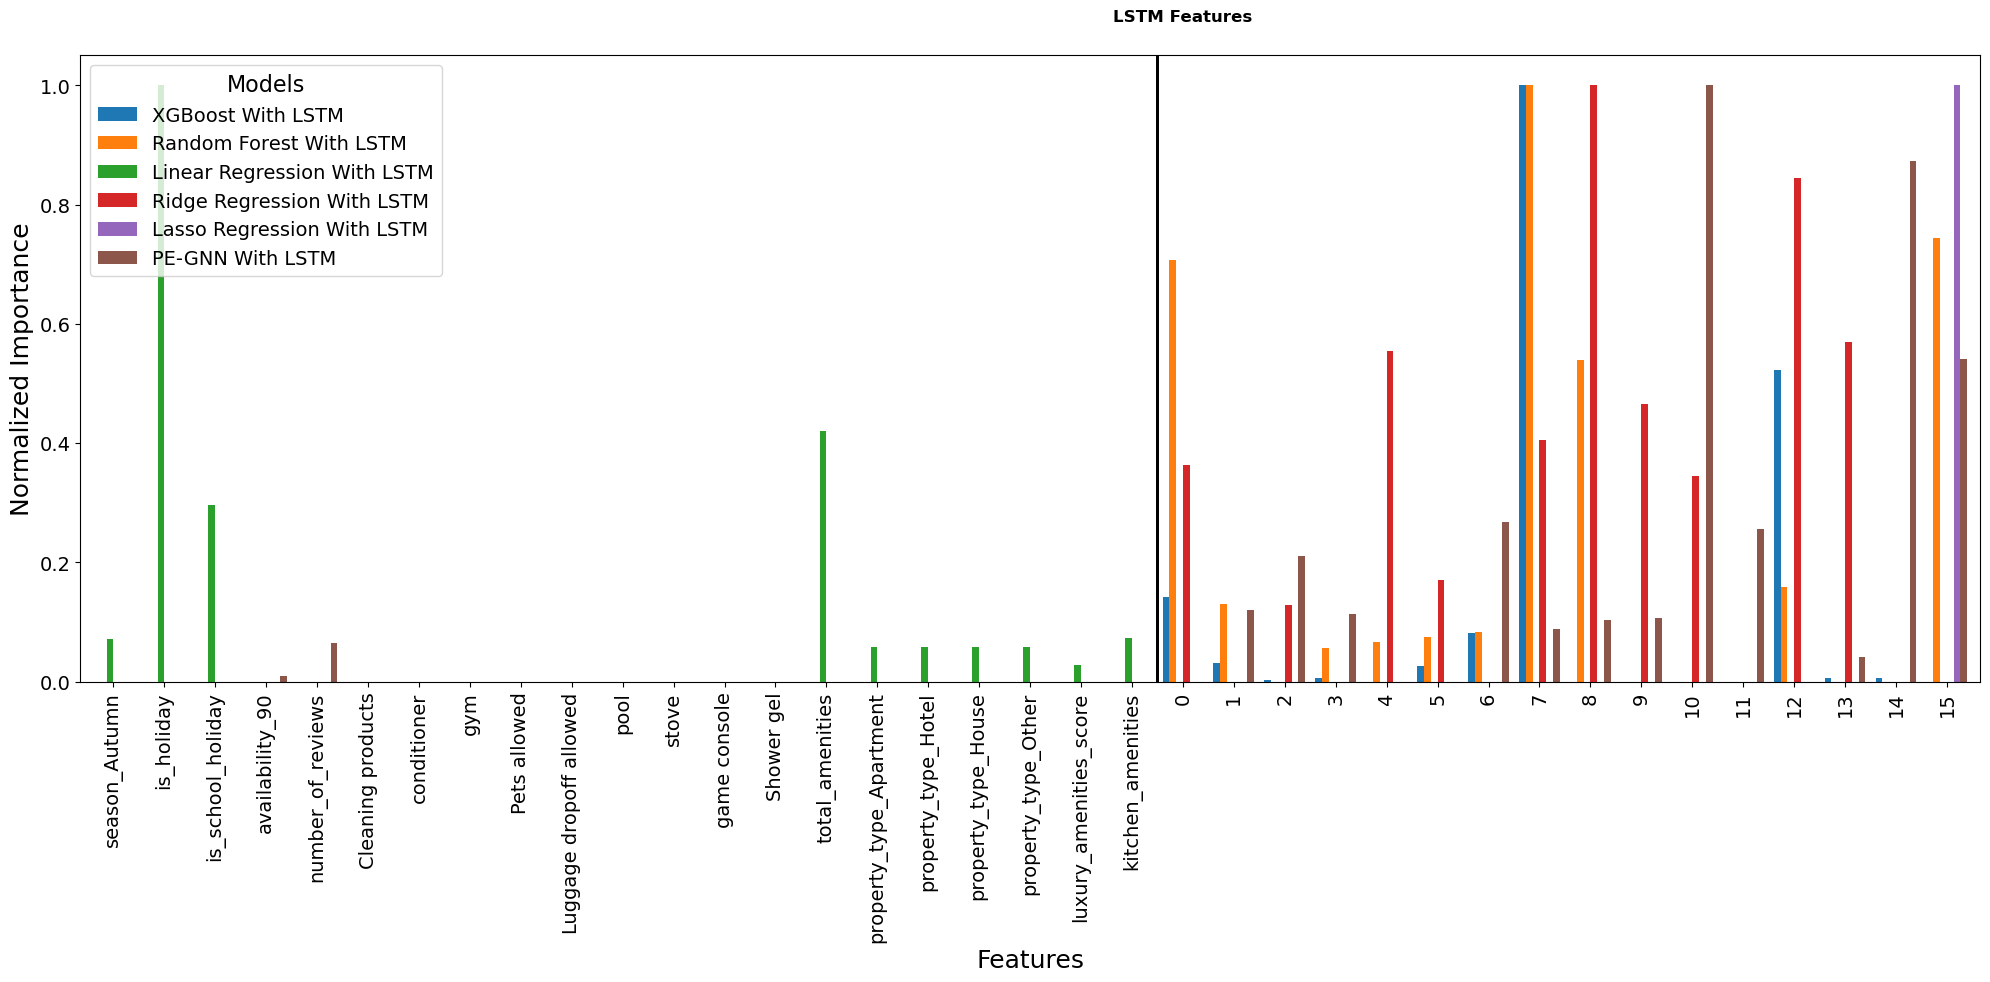

In [5]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# Load the test data
test_data_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaled_test_data_with_LSTM.csv'
df_test = pd.read_csv(test_data_path)

# Load the scaler used during training
scaler_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Baseline models/scaler_with_LSTM.pkl'
scaler = joblib.load(scaler_path)

# Separate the features and target
test_data_scaled = df_test.drop(columns=['price'])
test_target_scaled = df_test['price']

# Inverse transform the target to original scale
test_target = scaler.inverse_transform(test_target_scaled.values.reshape(-1, 1)).flatten()

# Load or define your models here. Replace these with actual model loading code.
# Dummy model definitions for the sake of example
xgb_with_lstm = xgb.XGBRegressor().fit(test_data_scaled, test_target_scaled)
rf_with_lstm = RandomForestRegressor().fit(test_data_scaled, test_target_scaled)
linear_with_lstm = LinearRegression().fit(test_data_scaled, test_target_scaled)
ridge_with_lstm = Ridge().fit(test_data_scaled, test_target_scaled)
lasso_with_lstm = Lasso().fit(test_data_scaled, test_target_scaled)

models = {
    'XGBoost With LSTM': xgb_with_lstm,
    'Random Forest With LSTM': rf_with_lstm,
    'Linear Regression With LSTM': linear_with_lstm,
    'Ridge Regression With LSTM': ridge_with_lstm,
    'Lasso Regression With LSTM': lasso_with_lstm,
}

# Load PE-GNN With LSTM feature importances from CSV
pegnn_lstm_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/NY Airbnb_Spatiotemporal_Analysis/Results models/feature_importances_with_lstm_ny.csv'
pegnn_lstm_df = pd.read_csv(pegnn_lstm_path)
pegnn_lstm_features = pegnn_lstm_df['Feature']
pegnn_lstm_importances = pegnn_lstm_df['Normalized Importance']

# Normalize PE-GNN importances if needed
pegnn_lstm_importances = MinMaxScaler().fit_transform(pegnn_lstm_importances.values.reshape(-1, 1)).flatten()

# Function to normalize importances
def normalize_importances(importances):
    scaler = MinMaxScaler()
    normalized_importances = scaler.fit_transform(importances.reshape(-1, 1)).flatten()
    return normalized_importances

# Collect all normalized importances and their top features
all_top_features = set()
all_importances = []

for model_name, model in models.items():
    if model_name.startswith('XGBoost') or model_name.startswith('Random Forest'):
        importances = model.feature_importances_
    elif model_name.startswith('Linear Regression') or model_name.startswith('Ridge Regression') or model_name.startswith('Lasso Regression'):
        importances = np.abs(model.coef_)
    
    normalized_importances = normalize_importances(importances)
    
    # Identify top 10 features for this model
    top_10_idx = np.argsort(normalized_importances)[-10:]
    top_10_features = test_data_scaled.columns[top_10_idx]  # Use feature names instead of integer indices
    top_10_importances = normalized_importances[top_10_idx]
    
    all_top_features.update(top_10_features)
    all_importances.append(pd.DataFrame(top_10_importances, index=top_10_features, columns=[model_name]))

# Add PE-GNN With LSTM to the combined DataFrame
pegnn_lstm_df = pd.DataFrame(pegnn_lstm_importances, index=pegnn_lstm_features, columns=['PE-GNN With LSTM'])
all_importances.append(pegnn_lstm_df)
all_top_features.update(pegnn_lstm_features)

# Combine the top features into a single DataFrame
combined_df = pd.concat(all_importances, axis=1)

# Filter the DataFrame to include only the top features
top_features_list = list(all_top_features)

# Ensure the original order of features
original_order_top_features = [feature for feature in test_data_scaled.columns if feature in top_features_list]
original_order_top_features.extend([feature for feature in pegnn_lstm_features if feature not in original_order_top_features])
filtered_importances_df = combined_df.loc[original_order_top_features]

# Plotting the bar plot with top features
plt.figure(figsize=(20, 10))
ax = filtered_importances_df.plot(kind='bar', figsize=(20, 10), width=0.8)

# Draw a vertical line after "kitchen_amenities"
if "kitchen_amenities" in filtered_importances_df.index:
    kitchen_amenities_index = filtered_importances_df.index.tolist().index("kitchen_amenities")
    plt.axvline(x=kitchen_amenities_index + 0.5, color='black', linewidth=2)

# Draw a vertical line before feature "0"
if "0" in filtered_importances_df.index:
    feature_0_index = filtered_importances_df.index.tolist().index("0")
    plt.axvline(x=feature_0_index - 0.5, color='black', linewidth=2)
    # Annotate the plot to indicate LSTM features
    plt.text(feature_0_index, ax.get_ylim()[1] * 1.05, 'LSTM Features', color='black', fontsize=12, ha='center', va='bottom', weight='bold')

# Customize the axis labels
plt.xlabel('Features', fontsize=18)
plt.ylabel('Normalized Importance', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14, title='Models', title_fontsize='16')


plt.tight_layout()
plt.show()